<a href="https://colab.research.google.com/github/micahjoseph/Ensemble-Learning-Techniques/blob/main/Ensembles_of_Decision_Trees(Credit_card_fraud_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation

### The dataset has credit card transactions where our objective is to identify the fraudulent transactions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [ ]:
# Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 2/Day 4/data/creditcard.csv")

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,-1.949546,-0.494436,-0.353696,0.158729,-0.267239,0.234802,-0.754936,-0.343012,0.312175,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,-0.587786,0.317419,-0.408521,0.719639,0.226926,-0.296316,-0.040143,0.119177,1.057682,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,-1.753256,-1.331010,-0.061941,-0.405532,0.048083,-0.307503,0.289363,0.189739,0.022546,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,0.607629,1.048673,-0.514821,0.329538,-1.041463,-0.498797,-0.276887,0.114245,0.379447,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,0.173132,1.430172,0.915609,-0.336588,1.140171,-0.653626,-0.016567,0.066287,0.242537,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [ ]:
# Checking the shape of our data
data.shape

(56962, 30)

In [ ]:
# Checking the distribution of two classes in the target variable
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

Clearly the dataset is heavily imbalanced!

In [ ]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

* Split the dataset into train and test using stratified sampling on our dependent variable. 
* Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45491
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11373
1       20
Name: Target, dtype: int64


In [ ]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Predicting on both train and test dataset using the fitted model

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

0.9995391603941276

In [ ]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.998683402089002

Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.8973809415105495

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.7996922535830476

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[45486,     5],
       [   16,    62]])

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[11366,     7],
       [    8,    12]])

Plot the variable importance

In [ ]:
features = X_train.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

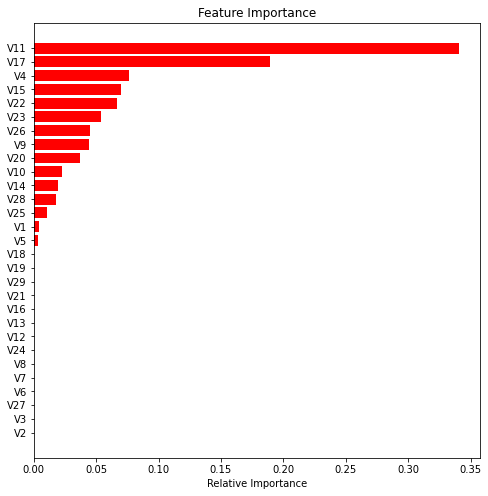

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()